In [1]:
import numpy,pandas,datetime
import matplotlib,matplotlib.pyplot
import scanpy
scanpy.settings.verbosity=5

# 1. Reading data

In [2]:
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

#idata=scanpy.read_csv('/Volumes/omics4tb2/alomana/projects/mscni/results/MINER/results.12104/regulons_activity_heatmap.csv',first_column_names=True)
idata=scanpy.read_csv('/Volumes/omics4tb2/alomana/projects/mscni/results/MINER/results.12104/full_heatmap.csv',first_column_names=True)
adata=idata.transpose()
print(adata)
figureFolderLabel='regulons'
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

2019-03-22 16:14:03
AnnData object with n_obs × n_vars = 3477 × 1489 
2019-03-22 16:14:04


# 2. Visualization

In [3]:
cellIDs=adata.obs_names.tolist()

dayLabels=[]; uDayLabels=[]
for cellID in cellIDs:
    dayLabel=cellID.split('_M397.')[1].split('.')[0]
    dayLabels.append(dayLabel)
    if dayLabel not in uDayLabels:
        uDayLabels.append(dayLabel) 
print(uDayLabels)
adata.obs['dayLabel']=dayLabels

['control', 'day3', 'day6', 'day13', 'day17', 'day24']


In [4]:
statesDictionary={}
with open('/Volumes/omics4tb2/alomana/projects/mscni/results/MINER/results.12104/stateLabels.csv') as f:
    for line in f:
        v=line.split(',')
        statesDictionary[v[1].replace('\n','')]=v[0]

stateLabels=[]
for cellID in cellIDs:
    stateLabels.append(statesDictionary[cellID])
adata.obs['stateLabel']=stateLabels

## 3.1. PCA

In [5]:
scanpy.tl.pca(adata, svd_solver='arpack')

    computing PCA with n_comps = 50
        finished (0:00:00.30)     and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)


... storing 'dayLabel' as categorical
... storing 'stateLabel' as categorical


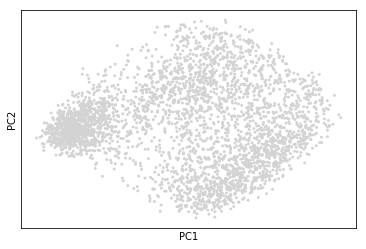

In [6]:
scanpy.pl.pca(adata)

## 3.2. UMAP

In [7]:
scanpy.pp.neighbors(adata, n_neighbors=10, n_pcs=50)

computing neighbors
    using 'X_pca' with n_pcs = 50
    computed neighbors (0:00:00.24)
    computed connectivities (0:00:03.19)
    finished (0:00:00.01) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [8]:
scanpy.tl.umap(adata)

computing UMAP
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
    finished (0:00:04.80) --> added
    'X_umap', UMAP coordinates (adata.obsm)


In [9]:
scanpy.tl.louvain(adata)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.19) --> found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


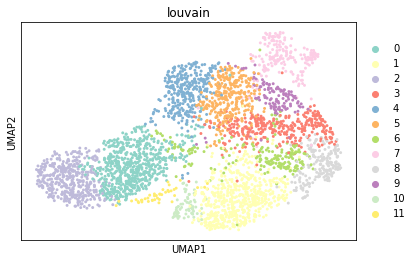

In [10]:
scanpy.pl.umap(adata, color=['louvain'],palette='Set3')

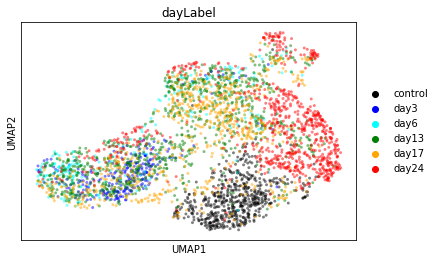

In [11]:
scanpy.pl.umap(adata, color=['dayLabel'],palette=['black','blue','cyan','green','orange','red'],alpha=0.5)

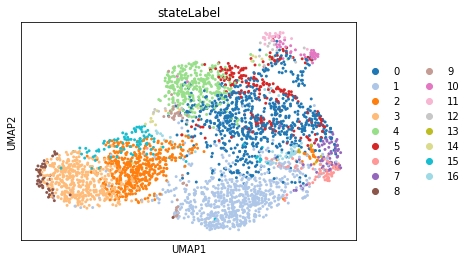

In [12]:
scanpy.pl.umap(adata, color=['stateLabel'],palette='tab20')

In [17]:
scanpy.tl.tsne(adata)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3477 samples in 0.050s...
[t-SNE] Computed neighbors for 3477 samples in 0.517s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3477
[t-SNE] Computed conditional probabilities for sample 2000 / 3477
[t-SNE] Computed conditional probabilities for sample 3000 / 3477
[t-SNE] Computed conditional probabilities for sample 3477 / 3477
[t-SNE] Mean sigma: 3.963002
[t-SNE] Computed conditional probabilities in 0.099s
[t-SNE] Iteration 50: error = 83.6996002, gradient norm = 0.1940594 (50 iterations in 1.586s)
[t-SNE] Iteration 100: error = 83.4566345, gradient norm = 0.1868066 (50 iterations in 1.601s)
[t-SNE] Iteration 150: error = 83.3925781, gradient norm = 0.1858453 (50 iterations in 1.619s)
[t-SNE] Iteration 200: error = 84.3292923, gradient norm = 0.1796572 (50 iterations in 1.557s)
[t-SNE] Iteration 250: erro

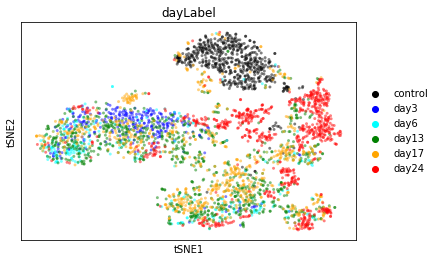

In [18]:
scanpy.pl.tsne(adata,color=['dayLabel'],palette=['black','blue','cyan','green','orange','red'],alpha=0.5)

## Highlighted by day

In [13]:
dayColors=['grey','blue','green','orange','red','magenta']
positions=adata.obsm['X_umap']
accumulatedDays=[]
for dayLabel in uDayLabels:
    
    accumulatedDays.append(dayLabel)
    tag='.'.join(accumulatedDays)
    
    xpos=[]; ypos=[]; myColors=[]
    for i in range(len(adata.obs['dayLabel'])):
        if adata.obs['dayLabel'][i] in accumulatedDays:
            xpos.append(positions[i,0])
            ypos.append(positions[i,1])
            myColors.append(dayColors[accumulatedDays.index(adata.obs['dayLabel'][i])])
    
    print(tag,accumulatedDays,len(xpos))
    matplotlib.pyplot.scatter(xpos,ypos,color=myColors,alpha=1/3,edgecolors='none')
    
    matplotlib.pyplot.xlim([-9.5,11])
    matplotlib.pyplot.ylim([-7,10])
    #matplotlib.pyplot.xlabel('umap1')
    #matplotlib.pyplot.ylabel('umap2')
    matplotlib.pyplot.xticks([])
    matplotlib.pyplot.yticks([])
    #matplotlib.pyplot.grid(color='k', linestyle=':', linewidth=1,alpha=1/3,zorder=0)
    
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.savefig('{}/day.{}.pdf'.format(figureFolderLabel,tag))
    matplotlib.pyplot.clf()

control ['control'] 572
control.day3 ['control', 'day3'] 862
control.day3.day6 ['control', 'day3', 'day6'] 1104
control.day3.day6.day13 ['control', 'day3', 'day6', 'day13'] 1999
control.day3.day6.day13.day17 ['control', 'day3', 'day6', 'day13', 'day17'] 2694
control.day3.day6.day13.day17.day24 ['control', 'day3', 'day6', 'day13', 'day17', 'day24'] 3477


<Figure size 432x288 with 0 Axes>

## Highlighted by day and Louvain membership

In [14]:
LouvainColors=adata.uns['louvain_colors']
LouvainMemberships=adata.obs['louvain'].tolist()
positions=adata.obsm['X_umap']
accumulatedDays=[]

for dayLabel in uDayLabels:
    
    accumulatedDays.append(dayLabel)
    tag='.'.join(accumulatedDays)
    
    xpos=[]; ypos=[]; myColors=[]
    for i in range(len(adata.obs['dayLabel'])):
        if adata.obs['dayLabel'][i] in accumulatedDays:
            xpos.append(positions[i,0])
            ypos.append(positions[i,1])
            myColors.append(LouvainColors[int(LouvainMemberships[i])])
    
    print(tag,accumulatedDays,len(xpos))
    matplotlib.pyplot.scatter(xpos,ypos,color=myColors,alpha=1/4,edgecolors='none')
    
    matplotlib.pyplot.xlim([-9.5,11])
    matplotlib.pyplot.ylim([-7,10])
    #matplotlib.pyplot.xlabel('umap1')
    #matplotlib.pyplot.ylabel('umap2')
    matplotlib.pyplot.xticks([])
    matplotlib.pyplot.yticks([])
    #matplotlib.pyplot.grid(color='k', linestyle=':', linewidth=1,alpha=1/3,zorder=0)
    
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.savefig('{}/louvain.{}.pdf'.format(figureFolderLabel,tag))
    matplotlib.pyplot.clf()

control ['control'] 572
control.day3 ['control', 'day3'] 862
control.day3.day6 ['control', 'day3', 'day6'] 1104
control.day3.day6.day13 ['control', 'day3', 'day6', 'day13'] 1999
control.day3.day6.day13.day17 ['control', 'day3', 'day6', 'day13', 'day17'] 2694
control.day3.day6.day13.day17.day24 ['control', 'day3', 'day6', 'day13', 'day17', 'day24'] 3477


<Figure size 432x288 with 0 Axes>

In [15]:
print(adata)

AnnData object with n_obs × n_vars = 3477 × 1489 
    obs: 'dayLabel', 'stateLabel', 'louvain'
    uns: 'pca', 'neighbors', 'louvain', 'louvain_colors', 'dayLabel_colors', 'stateLabel_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'


In [16]:
stateColors=adata.uns['stateLabel_colors']
stateMemberships=adata.obs['stateLabel'].tolist()
positions=adata.obsm['X_umap']
accumulatedDays=[]

for dayLabel in uDayLabels:
    
    accumulatedDays.append(dayLabel)
    tag='.'.join(accumulatedDays)
    
    xpos=[]; ypos=[]; myColors=[]
    for i in range(len(adata.obs['dayLabel'])):
        if adata.obs['dayLabel'][i] in accumulatedDays:
            xpos.append(positions[i,0])
            ypos.append(positions[i,1])
            myColors.append(stateColors[int(stateMemberships[i])])
    
    print(tag,accumulatedDays,len(xpos))
    matplotlib.pyplot.scatter(xpos,ypos,color=myColors,alpha=1/4,edgecolors='none')
    
    matplotlib.pyplot.xlim([-9.5,11])
    matplotlib.pyplot.ylim([-7,10])
    #matplotlib.pyplot.xlabel('umap1')
    #matplotlib.pyplot.ylabel('umap2')
    matplotlib.pyplot.xticks([])
    matplotlib.pyplot.yticks([])
    #matplotlib.pyplot.grid(color='k', linestyle=':', linewidth=1,alpha=1/3,zorder=0)
    
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.savefig('{}/state.{}.pdf'.format(figureFolderLabel,tag))
    matplotlib.pyplot.clf()

control ['control'] 572
control.day3 ['control', 'day3'] 862
control.day3.day6 ['control', 'day3', 'day6'] 1104
control.day3.day6.day13 ['control', 'day3', 'day6', 'day13'] 1999
control.day3.day6.day13.day17 ['control', 'day3', 'day6', 'day13', 'day17'] 2694
control.day3.day6.day13.day17.day24 ['control', 'day3', 'day6', 'day13', 'day17', 'day24'] 3477


<Figure size 432x288 with 0 Axes>